In [1]:
import numpy as np 
import pandas as pd
import json
import matplotlib.pyplot as plt

/Users/architaggarwal/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
kernel="sigmoid"

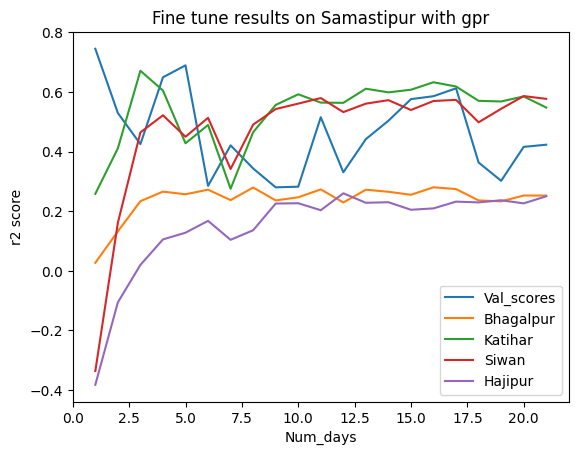

In [19]:
samastipur_bhagalpur = []
samastipur_katihar = []
samastipur_siwan = []
samastipur_hajipur = []
samastipur_val = []
num_days_list = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for num_days in range(1,22) :
    #results_path = f"logs/leave_one_out_finetune_hcs/finetune_{num_days}_days/svr_{kernel}_self_supervised_12.json"
    results_path = f"logs/leave_one_out_finetune_hcs/finetune_{num_days}_days/gpr_self_supervised_12.json"
    with open(results_path,'r') as f:
        scores = json.load(f)
    samastipur_bhagalpur.append(scores["SAMASTIPUR"]["BHAGALPUR"]['r2'])
    samastipur_katihar.append(scores["SAMASTIPUR"]["KATIHAR"]['r2'])
    samastipur_siwan.append(scores["SAMASTIPUR"]["SIWAN"]['r2'])
    samastipur_hajipur.append(scores["SAMASTIPUR"]["HAJIPUR"]['r2'])
    samastipur_val.append(scores["SAMASTIPUR"]["val_results"]['r2'])

plt.figure()

plt.plot(num_days_list,samastipur_val,label="Val_scores")
plt.plot(num_days_list,samastipur_bhagalpur,label="Bhagalpur")
plt.plot(num_days_list,samastipur_katihar,label="Katihar")
plt.plot(num_days_list,samastipur_siwan,label="Siwan")
plt.plot(num_days_list,samastipur_hajipur,label="Hajipur")

plt.legend()

plt.xlabel("Number of days")
plt.ylabel("r2 score")
#plt.title(f"Fine tune results on Samastipur with gpr")
save_path = f"plots/samastipur_finetune_numdaysVSr2_gpr.jpg"
plt.savefig(save_path)
plt.show()

    


In [4]:
name_map = {
    'KATIHAR':"Location 1",
    'SAMASTIPUR':"Location 2",
    'SIWAN':"Location 3",
    'HAJIPUR':"Location 4"
}

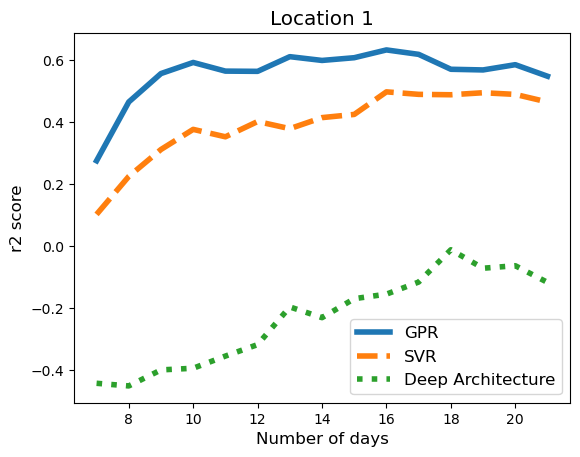

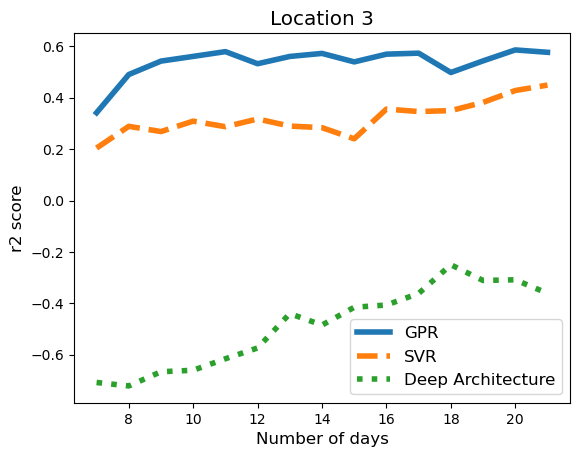

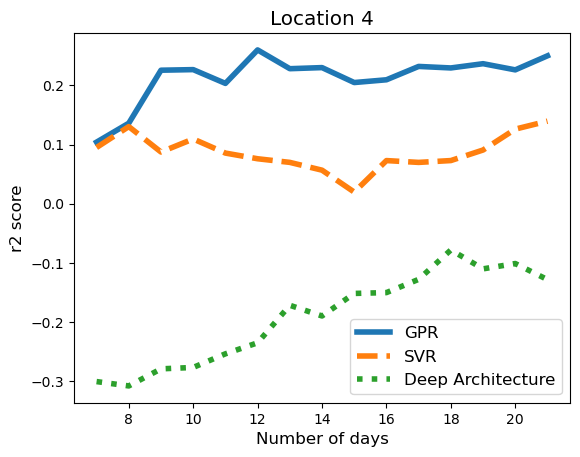

In [7]:
location = ["KATIHAR","SIWAN","HAJIPUR"]
samastipur_val = []
num_days_list = [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]
for loc in location:
    gpr_r2 = []
    svr_r2 = []
    nn_r2 = []

    for num_days in range(7,22) :
       gpr_path = f"logs/leave_one_out_finetune_hcs/finetune_{num_days}_days/gpr_self_supervised_12.json"
       svr_path = f"logs/leave_one_out_finetune_hcs/finetune_{num_days}_days/svr_rbf_self_supervised_12.json"
       nn_path = f"logs/leave_one_out_finetune_hcs/finetune_{num_days}_days/NN_12_7epochs.json"
       with open(gpr_path,'r') as f:
              gpr_scores = json.load(f)
       with open(svr_path,'r') as f:
              svr_scores = json.load(f)
       with open(nn_path,"r") as f:
              nn_scores = json.load(f)
       
       gpr_r2.append(gpr_scores["SAMASTIPUR"][loc]['r2'])
       svr_r2.append(svr_scores["SAMASTIPUR"][loc]['r2'])
       nn_r2.append(nn_scores["SAMASTIPUR"][loc]['r2'])


       

    plt.figure()

    plt.plot(num_days_list,gpr_r2,label="GPR",linestyle='-',linewidth=4)
    plt.plot(num_days_list,svr_r2,label="SVR",linestyle='--',linewidth=4)
    plt.plot(num_days_list,nn_r2,label="Deep Architecture",linestyle=':',linewidth=4)
    
    

    plt.legend(fontsize='large')

    plt.xlabel("Number of days",fontsize='large')
    plt.ylabel("r2 score",fontsize='large')
    plt.title(f"{name_map[loc]}",fontsize='x-large')
    save_path = f"plots/samastipur_finetune2/samastipur-{loc}.pdf"
    plt.savefig(save_path)
    plt.show()

    
